# Hypothesis Testing with Insurance Data (Core)

Ashik Sathiya



In [24]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("insurance - insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## - Q1. Do smokers have higher insurance charges than non-smokers?


### State your Null Hypothesis and Alternative Hypothesis


Null Hypothesis (H0): Smokers do not have higher insurance charges than non-smokers.

Alternative Hypothesis (H1): Smokers have higher insurance charges than non-smokers.



### Select the correct test according to the data type and number of samples


Two-sample t-test 

### Test the assumptions of your selected test.


In [3]:
# Filtering out smokers and nonsmokers
smoker_df = df.loc[df['smoker']== "yes"].copy()
non_smoker_df = df.loc[df['smoker']== "no"].copy()

In [4]:
# Feature of Interest 
smoker_charge = smoker_df['charges']
no_smoker_charge = non_smoker_df['charges']

Outliers

In [5]:
# Check for and remove outliers smoker

zscores= stats.zscore(smoker_charge)
outliers = abs(zscores)>3
np.sum(outliers)

0

In [6]:
# Check for and remove outliers smoker

zscores= stats.zscore(no_smoker_charge)
outliers = abs(zscores)>3
np.sum(outliers)

24

In [7]:
# remove outliers from no smoker group
no_smoker_charge = no_smoker_charge[(np.abs(stats.zscore(no_smoker_charge)) < 3)]

Check for Normality



In [8]:
# test the smoker group for normality
result_smoker = stats.normaltest(smoker_charge)
result_smoker

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [9]:
# test the non smoker group for normality
result_no_smoker = stats.normaltest(no_smoker_charge)
result_no_smoker

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

Check for Equal Variance



In [10]:
# Test for equal variance
result = stats.levene(smoker_charge, no_smoker_charge)
result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

### Execute the selected test, or the alternative test (if you do not meet the assumptions)


In [12]:
# Independent t-test with equal_var set to False
result = stats.ttest_ind(smoker_charge, no_smoker_charge, equal_var = False)
result

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)

In [13]:
print(f"p-value={result.pvalue:.10f}")
print(f"Significant: {result.pvalue <.05}")

p-value=0.0000000000
Significant: True


### Interpret your p-value and reject or fail to reject your null hypothesis 


Remember that a significant result (p < 0.05) means we reject the null hypothesis and accept the alternative hypothesis. 

Smokers have higher insurance charges than non-smokers.


### Show a supporting visualization that helps display the result


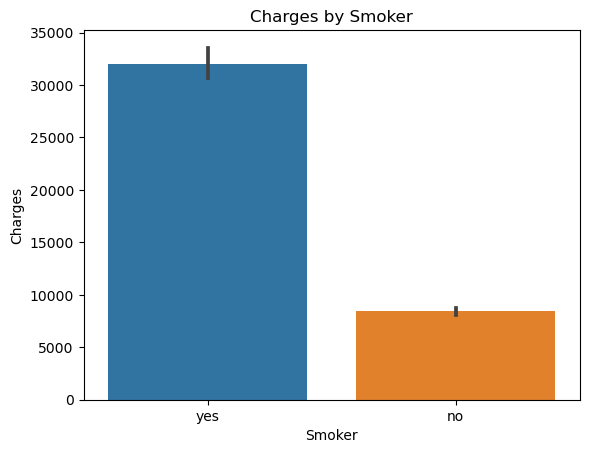

In [43]:
sns.barplot(data=df, x='smoker',y='charges');

plt.title('Charges by Smoker')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.xticks(rotation=0)
plt.show()

## - Q2. Are men more likely to smoke than women?


### State your Null Hypothesis and Alternative Hypothesis


Null Hypothesis (H0): There is no significant difference in smoking habits between men and women.

Alternative Hypothesis (H1): There is a significant difference in smoking habits between men and women.

### Select the correct test according to the data type and number of samples


Chi-squared test

### Test the assumptions of your selected test.


In [14]:
#Contigency Table
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


### Execute the selected test, or the alternative test (if you do not meet the assumptions)


In [15]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

In [17]:
# What was our p-value?
print(p)
p<.05

0.006548143503580696


True

### Interpret your p-value and reject or fail to reject your null hypothesis 


Since our p < .05, we reject the null hypothesis.

There is a significant difference in smoking habits between men and women.



### Show a supporting visualization that helps display the result


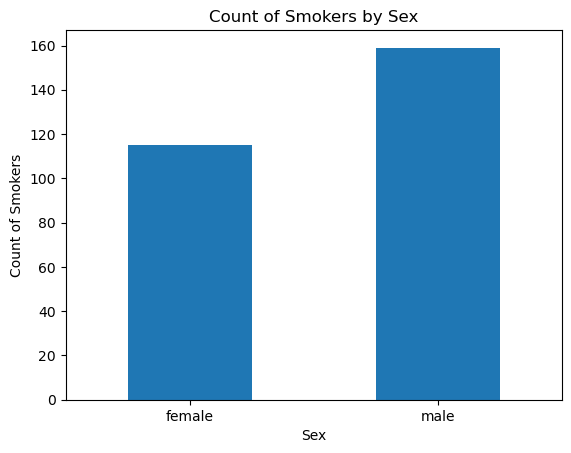

In [42]:
smokers_df = df[df['smoker'] == 'yes']

smoker_count = smokers_df.groupby('sex').size()

smoker_count.plot(kind='bar')
plt.title('Count of Smokers by Sex')
plt.xlabel('Sex')
plt.ylabel('Count of Smokers')
plt.xticks(rotation=0)
plt.show()





## - Q3. Do different regions have different charges, on average?

### State your Null Hypothesis and Alternative Hypothesis


Null Hypothesis (H0): The average charges are the same across all regions.

Alternative Hypothesis (H1): The average charges are different across at least one pair of regions.

### Select the correct test according to the data type and number of samples


ANOVA

### Test the assumptions of your selected test.


In [19]:
## Create groups dictionary. There are only 3 groups, but this is even more helpful when there are many groups
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [28]:
# Check for and remove outliers smoker
groups['southwest']

0       16884.92400
12       1826.84300
15       1837.23700
18      10602.38500
19      36837.46700
           ...     
1316     1731.67700
1329    10325.20600
1331    10795.93733
1332    11411.68500
1336     2007.94500
Name: charges, Length: 325, dtype: float64

Assumption of Normality



In [20]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [21]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


In [22]:
# with the * operator 
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

### Execute the selected test, or the alternative test (if you do not meet the assumptions)


In [29]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

### Interpret your p-value and reject or fail to reject your null hypothesis 


Reject the null hypothesis. There is evidence that the average charges differ across regions.

### Show a supporting visualization that helps display the result


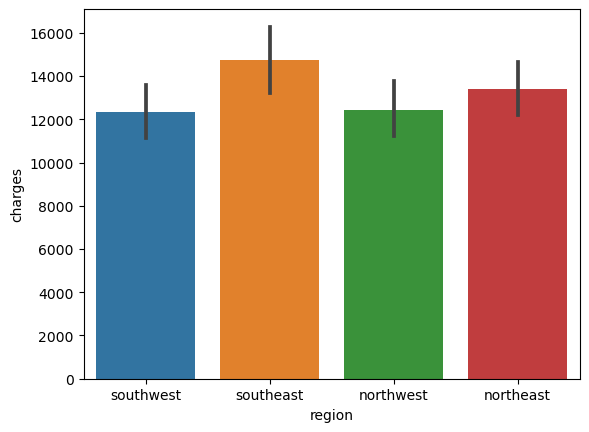

In [25]:
sns.barplot(data=df, x='region',y='charges');

plt.title('Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.xticks(rotation=0)
plt.show()
